# Algoritmos

In [2]:
class Sort:
    
    count = 0
    
    def __init__(self, count):
        self.count = count

    def setCount(self, count):
        self.count = count
        
    def selectionSort(self, arr):
        for i in range(len(arr)): 

            # Find the minimum element in remaining  
            # unsorted array 
            min_idx = i 
            for j in range(i+1, len(arr)): 
                self.count += 1
                if arr[min_idx] > arr[j]: 
                    min_idx = j 

            # Swap the found minimum element with  
            # the first element         
            arr[i], arr[min_idx] = arr[min_idx], arr[i] 
        
    def insertionSort(self, arr): 

        # Traverse through 1 to len(arr) 
        for i in range(1, len(arr)): 

            key = arr[i] 

            # Move elements of arr[0..i-1], that are 
            # greater than key, to one position ahead 
            # of their current position 
            j = i-1
            while j >= 0 and key < arr[j] : 
                    self.count += 2
                    arr[j + 1] = arr[j] 
                    j -= 1
            self.count += 1
            arr[j + 1] = key 
        
    def bubbleSort(self, arr): 

        n = len(arr) 

        # Traverse through all array elements 
        for i in range(n): 

            # Last i elements are already in place 
            for j in range(0, n-i-1): 

                # traverse the array from 0 to n-i-1 
                # Swap if the element found is greater 
                # than the next element
                self.count += 1
                if arr[j] > arr[j+1] : 
                    arr[j], arr[j+1] = arr[j+1], arr[j]
                
    def quickSort_r(self,arr,low,high): 
        self.count += 1
        if low < high: 

            # pi is partitioning index, arr[p] is now 
            # at right place 
            pi = self.part(arr,low,high) 

            # Separately sort elements before 
            # partition and after partition 
            self.quickSort_r(arr, low, pi-1) 
            self.quickSort_r(arr, pi+1, high)

    def quickSort(self, arr):
        self.quickSort_r(arr, 0, len(arr)-1)
    
    def part(self, arr, low, high):

        pivot = random.randint(low, high) # pivot
        
        temp = arr[pivot]
        arr[pivot] = arr[low]
        arr[low] = temp
        
        while (low < high):
            self.count += 2
            if arr[low + 1] <= arr[low]:
                temp = arr[low]
                arr[low] = arr[low + 1]
                arr[low + 1] = temp
                low += 1
            else:
                temp = arr[high]
                arr[high] = arr[low + 1]
                arr[low + 1] = temp
                high -= 1
        
        self.count += 1
        return low

    def mergeSort(self, arr):

        self.count += 1
        if len(arr) >1: 
            mid = len(arr)//2 # Finding the mid of the array 
            L = arr[:mid] # Dividing the array elements  
            R = arr[mid:] # into 2 halves 

            self.mergeSort(L) # Sorting the first half 
            self.mergeSort(R) # Sorting the second half 

            i = j = k = 0

            # Copy data to temp arrays L[] and R[] 
            while i < len(L) and j < len(R):
                self.count += 2
                if L[i] < R[j]: 
                    arr[k] = L[i] 
                    i+= 1
                else: 
                    arr[k] = R[j] 
                    j+= 1
                k+= 1

            self.count += 1    
                
            # Checking if any element was left 
            while i < len(L): 
                self.count += 1
                arr[k] = L[i] 
                i+= 1
                k+= 1

            self.count += 1    
                
            while j < len(R):
                self.count += 1
                arr[k] = R[j] 
                j+= 1
                k+= 1
                
            self.count += 1
            
            
    def mixcoacSort(self, arr):
        paso = 1
        
        while(paso < len(arr)):
            self.count += 1
            i = 0
            while(i < len(arr) - paso):
                self.count += 1
                self.merg(arr, i, i+(2*paso)-1, paso);
                i += paso*2
 
            paso *= 2;
        
    def merg(self, arr, ini, fin, paso):
        
        if(ini + paso*2 - 1 >= len(arr)):
            fin = len(arr) - 1
            self.count += 1  
               
        tam = fin - ini + 1
        k = 0
        i = ini
        j = ini + paso
        res = []
      
        while(k < tam):
            self.count += 1  
            if(j > fin or (i < (ini + paso) and arr[i] <= arr[j])):
                res.append(arr[i])
                i += 1
                self.count += 1  

            else:
                self.count += 1  
                res.append(arr[j])
                j += 1

            k += 1
        
        m = 0
        while(m < tam):
            self.count += 1
            arr[ini + m] = res[m]
            m += 1

# Trabajo

In [3]:
%pylab inline
import numpy as np
import time
from matplotlib.pyplot import cm
import random
from functools import total_ordering 

Populating the interactive namespace from numpy and matplotlib


In [4]:
@total_ordering
class Movie:
    
    codigo = None
    año =  None
    titulo = None
    
    def __init__(self, codigo, año, titulo):
        self.codigo = codigo
        self.año = año
        self.titulo = titulo
    
    def __lt__(self, other):
        return self.titulo < other.titulo
    
    def __eq__(self, other):
        return self.titulo == other.titulo
    
    def __repr__(self):
        return self.codigo + "-" + self.año + "-" + self.titulo
        

In [5]:
movies_arr = []
movies = open("movie_titles.txt", "r", encoding='latin-1')
for line in movies:
    x = line.split(",", 2)
    codigo = x[0]
    año = x[1]
    titulo = x[2]
    m = Movie(codigo, año, titulo)
    movies_arr.append(m)

In [6]:
color = cm.rainbow(np.linspace(0,1,6))

# Datos Ordenados

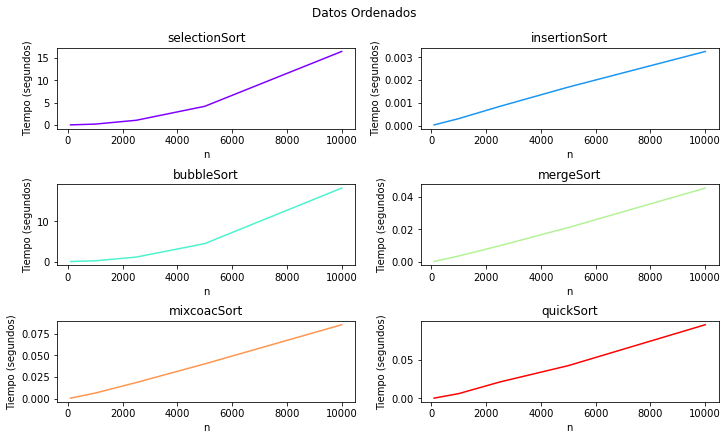

In [6]:
n_s = [100, 1000, 2500, 5000, 10000]
SortObj = Sort(0)
sorters = [SortObj.selectionSort, SortObj.insertionSort, SortObj.bubbleSort, 
           SortObj.mergeSort, SortObj.mixcoacSort, SortObj.quickSort]

n_do = []
times_do = []

for i in sorters:
    times_do.append([])
    n_do.append([])

func = 0
for funcsort in sorters:
    for i in n_s:
        start_time = time.perf_counter()
        funcsort(movies_arr[:i])
        stop_time = time.perf_counter() - start_time
        times_do[func].append(stop_time)
        n_do[func].append(SortObj.count)
        SortObj.setCount(0)
    
    func += 1

fig, axs = plt.subplots(3, 2, figsize=(10,6), constrained_layout=True)
fig.suptitle("Datos Ordenados")

count = 0
for i in range(0, 3):
    for j in range(0, 2):
        axs[i, j].plot(n_s, times_do[count], c = color[count])
        axs[i, j].set_title(sorters[count].__name__)
        count += 1
        
for ax in axs.flat:
    ax.set(xlabel='n', ylabel='Tiempo (segundos)')
    
plt.savefig("B1.png")

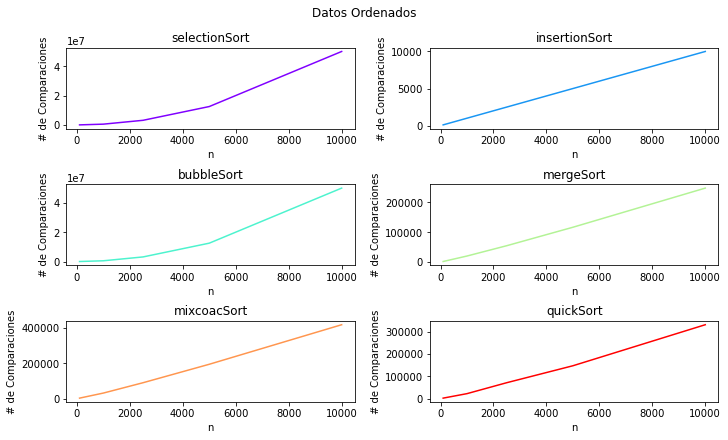

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(10,6), constrained_layout=True)
fig.suptitle("Datos Ordenados")

count = 0
for i in range(0, 3):
    for j in range(0, 2):
        axs[i, j].plot(n_s, n_do[count], c = color[count])
        axs[i, j].set_title(sorters[count].__name__)
        count += 1
        
for ax in axs.flat:
    ax.set(xlabel='n', ylabel='# de Comparaciones')
    
plt.savefig("A1.png")

# Datos en Orden Inverso

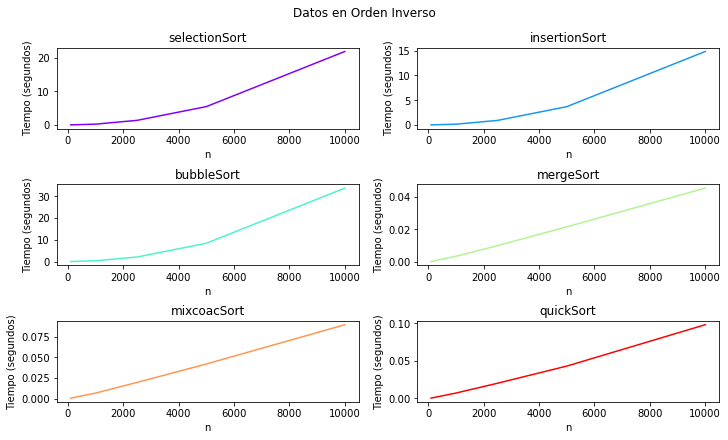

In [8]:
movies_arr_inver = []
movies_arr_inver_1 = []
length = len(movies_arr)
for i in range(length - 1, 0, -1):
    movies_arr_inver.append(movies_arr[i])
    
times_oi = []
n_oi = []

for i in sorters:
    times_oi.append([])
    n_oi.append([])
    
func = 0
for funcsort in sorters:

    for i in n_s:
        movies_arr_inver_1 = movies_arr_inver
        start_time = time.perf_counter()
        funcsort(movies_arr_inver_1[:i])
        stop_time = time.perf_counter() - start_time
        times_oi[func].append(stop_time)
        n_oi[func].append(SortObj.count)
        SortObj.setCount(0)
    
    func += 1
    
fig, axs = plt.subplots(3, 2, figsize=(10,6), constrained_layout=True)
fig.suptitle("Datos en Orden Inverso")

count = 0
for i in range(0, 3):
    for j in range(0, 2):
        axs[i, j].plot(n_s, times_oi[count], c = color[count])
        axs[i, j].set_title(sorters[count].__name__)
        count += 1
        
for ax in axs.flat:
    ax.set(xlabel='n', ylabel='Tiempo (segundos)')
    
plt.savefig("B2.png")

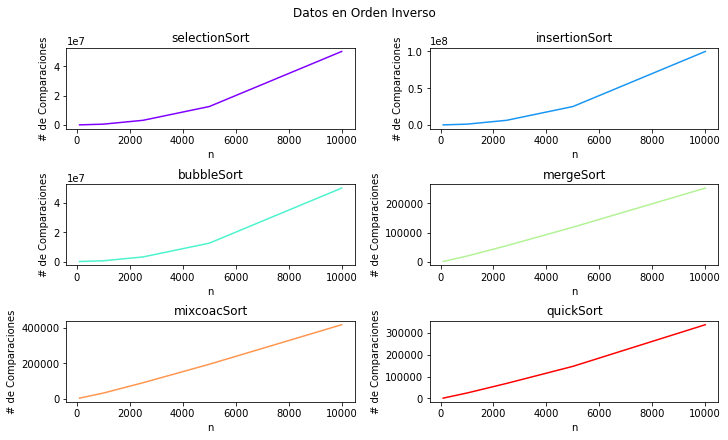

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(10,6), constrained_layout=True)
fig.suptitle("Datos en Orden Inverso")

count = 0
for i in range(0, 3):
    for j in range(0, 2):
        axs[i, j].plot(n_s, n_oi[count], c = color[count])
        axs[i, j].set_title(sorters[count].__name__)
        count += 1
        
for ax in axs.flat:
    ax.set(xlabel='n', ylabel='# de Comparaciones')
    
plt.savefig("A2.png")

# Datos en Orden Aleatorio

In [10]:
times_oa = []
n_oa = []

for i in sorters:
    times_oa.append([])
    n_oa.append([])
    
func = 0
arr1 = []
arr2 = []
for funcsort in sorters:

    for i in n_s:
        
        for j in range(0, 30):
            movies_arr_rand = []
            
            for k in range(0, i):
                movies_arr_rand.append(movies_arr[random.randint(0,17769)])
                
            start_time = time.perf_counter()
            funcsort(movies_arr_rand[:i])
            stop_time = time.perf_counter() - start_time
            arr1.append(stop_time)
            arr2.append(SortObj.count)
            SortObj.setCount(0)
    
        stop_time = sum(arr1) / 30
        ns = sum(arr2) / 30
        times_oa[func].append(stop_time)
        n_oa[func].append(ns)
        arr1 = []
        arr2 = []
    func += 1

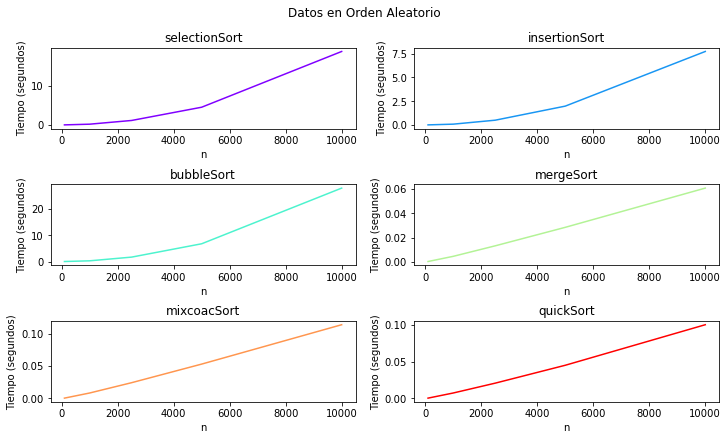

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(10,6), constrained_layout=True)
fig.suptitle("Datos en Orden Aleatorio")

count = 0
for i in range(0, 3):
    for j in range(0, 2):
        axs[i, j].plot(n_s, times_oa[count], c = color[count])
        axs[i, j].set_title(sorters[count].__name__)
        count += 1
        
for ax in axs.flat:
    ax.set(xlabel='n', ylabel='Tiempo (segundos)')
    
plt.savefig("B3.png")

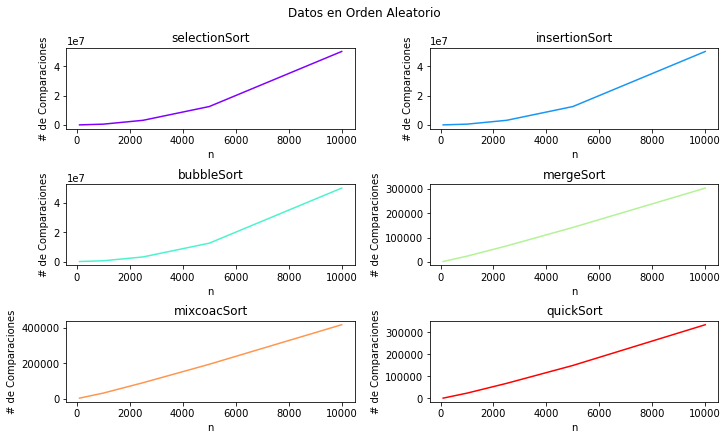

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(10,6), constrained_layout=True)
fig.suptitle("Datos en Orden Aleatorio")

count = 0
for i in range(0, 3):
    for j in range(0, 2):
        axs[i, j].plot(n_s, n_oa[count], c = color[count])
        axs[i, j].set_title(sorters[count].__name__)
        count += 1
        
for ax in axs.flat:
    ax.set(xlabel='n', ylabel='# de Comparaciones')
    
plt.savefig("A3.png")